# Melbourne Landuse

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!pip install osmnx

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.2/102.2 kB 1.7 MB/s eta 0:00:00


In [3]:
import osmnx as ox
import pandas as pd
import geopandas as gpd

# setting blanket crs
crs = 'EPSG:3112'


In [4]:
# defining christchurch boundary
melbourne = 'City of Melbourne, Australia'

# Check boundary is correct
melb = ox.geocode_to_gdf(melbourne)
melb = melb.to_crs(crs)

## Creating Greenspace dataframe

In [5]:
# choosing tags from OSM that represent all kinds of greenspace
greenspace_tags = {'landuse':['flowerbed','forest',
                              'greenhouse_horticulture',
                              'meadow','orchard',
                              'plant_nursery','vineyard',
                              'grass','greenfield','village_green'],
                   'leisure':['dog_park','garden','golf_course',
                              'nature_reserve','park','pitch']
                  }

In [6]:
# getting green space from OSM, assigning crs and removing points
greenspace = ox.features_from_place(melbourne, tags=greenspace_tags)
greenspace_gdf = greenspace.to_crs(crs)
greenspace_gdf = greenspace_gdf[greenspace_gdf.geometry.type != 'Point']
greenspace_gdf = greenspace_gdf.drop(columns=['nodes','ways'])

# saving to geopackage
greenspace_gdf.to_file('/content/drive/MyDrive/FinalProject/Data/Landuse-data/Melbourne/greenspace.gpkg', driver='GPKG')

<frozen importlib._bootstrap>:914: ImportWarning: APICoreClientInfoImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _PyDriveImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _OpenCVImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _BokehImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _AltairImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: APICoreClientInfoImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _PyDriveImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _OpenCVImportHook.find_spec() not found; falling back to find_module()
<frozen imp

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<Axes: >

<frozen importlib._bootstrap>:914: ImportWarning: APICoreClientInfoImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _PyDriveImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _OpenCVImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _BokehImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _AltairImportHook.find_spec() not found; falling back to find_module()


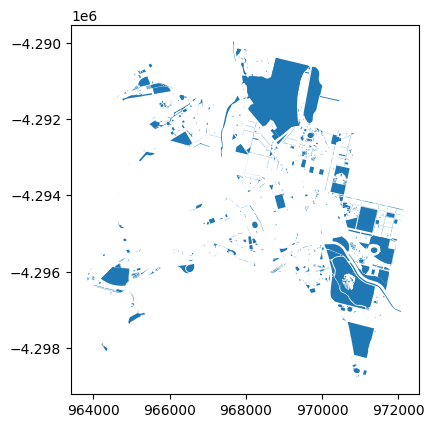

In [7]:
greenspace_gdf.plot()

## Creating brownfield data frame

In [8]:
brownfield_tags = {'landuse':'brownfield'}

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [9]:
# getting green space from OSM, assigning crs and removing points
brownfields = ox.features_from_place(melbourne, tags=brownfield_tags)
brownfields_gdf = brownfields.to_crs(crs)
brownfields_gdf = brownfields_gdf[brownfields_gdf.geometry.type != 'Point']
brownfields_gdf = brownfields_gdf.drop(columns=['nodes'])

# saving to geopackage
brownfields_gdf.to_file('/content/drive/MyDrive/FinalProject/Data/Landuse-data/Melbourne/brownfields.gpkg', driver='GPKG')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<Axes: >

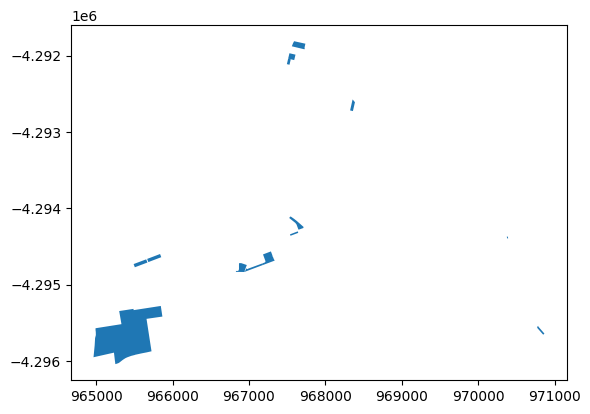

In [10]:
brownfields_gdf.plot()

## Creating building footprint dataframe

In [11]:
buildings = ox.features_from_place(melbourne, tags={'building':True})
buildings_gdf = buildings.to_crs(crs)
buildings_gdf = buildings_gdf[buildings_gdf.geometry.type != 'Point']

# saving to geopackage
#buildings_gdf.to_file('/content/drive/MyDrive/FinalProject/Data/Landuse-data/Melbourne/buildings.gpkg', driver='GPKG')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


## Converting building foot prints to city block polygons
I want to use the city block polygons defined earlier. If buildings cover more than 70 percent of the city block area, I will identify the area as built-up

In [13]:
import geopandas as gpd
city_blocks = gpd.read_file('/content/drive/MyDrive/FinalProject/Data/city-blocks/Melbourne/city-blocks.gpkg')

# removing unecessary columns
city_blocks = city_blocks.drop(columns=['level_0', 'level_1'])
city_blocks["contains_building"] = False
city_blocks = city_blocks.reset_index()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [14]:
# checking if each city block contains more than 50 percent building coverage

# intersection of city blocks and buildings
intersections = gpd.overlay(city_blocks, buildings_gdf, how='intersection')

# Calculate the area of each intersection
intersections['intersection_area'] = intersections['geometry'].area

# city block area
city_blocks['block_area'] = city_blocks['geometry'].area

# Calculate the total area of building footprints
total_building_area = buildings_gdf['geometry'].unary_union.area

# Calculate the percentage of each city block covered by buildings
intersections_grouped = intersections.groupby('index')['intersection_area'].sum().reset_index()
city_blocks = city_blocks.merge(intersections_grouped, on='index', how='left')
city_blocks['building_coverage_percentage'] = (city_blocks['intersection_area'] / city_blocks['block_area']) * 100

# Create a new dataframe for built-up areas based on the threshold (e.g., 70%)
threshold = 70
built_up_areas = city_blocks[city_blocks['building_coverage_percentage'] >= threshold]


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [15]:
# saving built up areas to file
built_up_areas.to_file('/content/drive/MyDrive/FinalProject/Data/city-blocks/Melbourne/built-up-areas.gpkg', driver='GPKG')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


## Locating publicly accessible parks

In [16]:
# Locating all of the parks in Christchurch
parks = ox.features_from_place(melbourne, tags={'leisure':'park'})
parks_gdf = parks.to_crs(crs)

# showing only parks that are not private according to OSM. There are two locations that are tagged as private
public_parks_gdf = parks_gdf[parks_gdf['access'] != 'private']
public_parks_gdf = public_parks_gdf[public_parks_gdf.geometry.type != 'Point']
public_parks_gdf = public_parks_gdf.drop(columns=['nodes','ways'])

# saving to geopackage
public_parks_gdf.to_file('/content/drive/MyDrive/FinalProject/Data/Landuse-data/Melbourne/public-parks.gpkg', driver='GPKG')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


### Static Visualisation

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Text(0.5, 1.0, 'City of Melbourne')

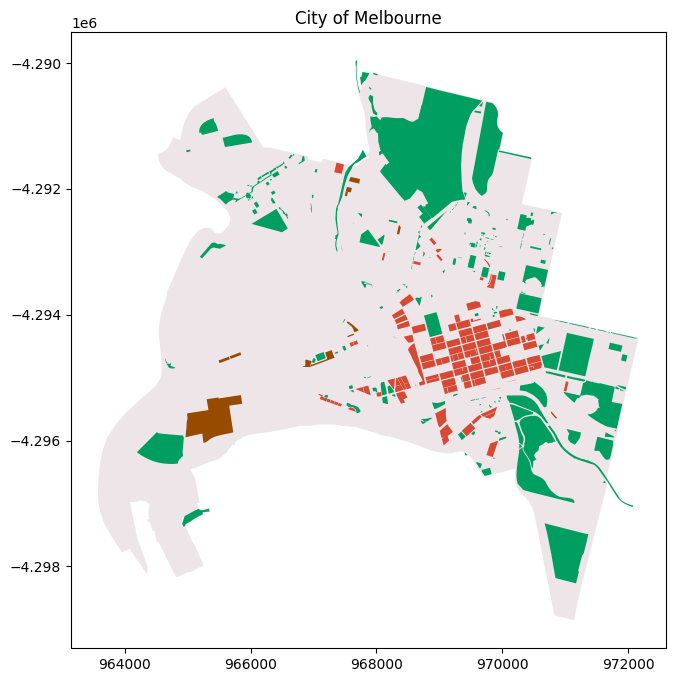

In [17]:
# Visualise in a single figure all the OSM data that was foud:
# Create a figure and an axis for plotting, and set the figure size
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(8, 8))

# Plot each of the GeoDataFrames on the plotting axis to ensure they are all on the same figure
# Plot the 'area' GeoDataFrame with black face color
melb.plot(ax=ax, facecolor="#EEE5E9")

# edges geodataframe
brownfields_gdf.plot(ax=ax, facecolor="#964B00", label='Brownfields')

# hospitals geodataframe
built_up_areas.plot(ax=ax, facecolor="#D64933", label='High Density')

# public parks
public_parks_gdf.plot(ax=ax, facecolor='#009E60', label='Parks')

# private parks

#ax.legend(labels=['brownfields_gdf', 'buildings_gdf', 'public_parks_gdf'])
ax.set_title('City of Melbourne')
